# Customer Product Prediction 

**Authors:** Maria Alejandra Aponte

This notebook presents a data mining project focused on predicting whether a customer will acquire a financial product in the following month. The dataset includes customer behavior and product subscription history.

## Business Context

The goal is to support **cross-selling strategies** by identifying which clients are more likely to purchase additional services.

## Project Steps

1. **Exploratory Data Analysis (EDA)**: Understand the structure and distribution of the data.
2. **Preprocessing**: Clean and prepare data for modeling.
3. **Modeling**: Build predictive models using Decision Trees and Neural Networks.
4. **Evaluation**: Compare the performance of the models to identify the best approach.


## Conclusions

- The Decision Tree model provides a transparent baseline that is easy to interpret and implement.
- The Neural Network, while more complex, could offer better generalization depending on hyperparameter tuning and data scaling.
- The data shows clear potential for cross-selling optimization through targeted campaigns, especially when combined with predictive analytics.

Future improvements could include hyperparameter tuning, feature selection, or the use of ensemble methods like Random Forest or Gradient Boosting.


In [ ]:
# pip install --upgrade tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from google.colab import drive
drive.mount('/content/drive')
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV,cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Recall
import datetime

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_csv('/content/drive/MyDrive/Universidad/4to curso uni/Minería de datos/datos_practica_small_20k_con_mes.csv')
datos
type(datos)
datos[1:3]

,MES,MB_TOTALES,FACTURACION_TOTAL_IMPUESTOS,FACTURACION_CUOTA,SEGUNDOS_LLAMADA_RED_PROPIA,SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA,MB_MENSUALES,EDAD,NUM_LLAMADAS_RED_PROPIA,...,MINUTOS_LLAMADAS_MENSUALES,NUM_DIAS_BUNDLE,KPI_IMPUESTOS,NUM_DESACTIVACIONES,PORCENTAJE_SEGUNDOS_RED_PROPIA,SERVICIOS_TOTALES_MARCA,SERVICIOS_TOTALES_POSPAGO,MINUTOS_LLAMADAS_MOVIL,PENETRACION_FIJO_ZONA,TARGET
1,201911,18280.292969,32.005001,26.450001,13288.0,9194.0,49.0,18280.292969,25.0,152.0,...,166.050007,435,5.555000,0,100.0,1,2,0.0,0.380171,0
2,201906,2141.692810,37.442001,31.400000,13.0,13.0,0.0,2141.692810,47.0,4.0,...,108.850102,0,2.042002,0,100.0,2,2,0.0,0.156041,0


In [ ]:
correlation_matrix = datos.corr()
print(correlation_matrix)

                                           MES  MB_TOTALES  \
MES                                   1.000000    0.131015   
MB_TOTALES                            0.131015    1.000000   
FACTURACION_TOTAL_IMPUESTOS          -0.007210    0.355991   
FACTURACION_CUOTA                     0.028984    0.504582   
SEGUNDOS_LLAMADA_RED_PROPIA           0.037449    0.156855   
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  0.032442    0.161772   
SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA -0.062915    0.192585   
MB_MENSUALES                          0.131030    0.999710   
EDAD                                  0.042566   -0.149113   
NUM_LLAMADAS_RED_PROPIA              -0.055262    0.212823   
FACTURACION_TOTAL_SIN_IMPUESTOS      -0.009287    0.341453   
NUM_LINEAS_PRIN_POSPAGO              -0.053178    0.130244   
NUM_LINEAS_POSPAGO                    0.018389    0.336948   
NUM_LINEAS_FIJAS                      0.001045   -0.000184   
NUM_DIAS_CONVERGENTE                  0.064951    0.063585   
NUM_LINE

In [ ]:
#Eliminamos las variables
datos2 = datos.drop(['MB_MENSUALES',
'FACTURACION_TOTAL_SIN_IMPUESTOS',
'SEGUNDOS_LLAMADA_ENTRANTE_RED_PROPIA',
'NUM_SERVICIOS_POSPAGO',
'NUM_LINEAS_POSPAGO',
'NUM_LINEAS_TECNOLOGIA_DESCONOCIDA',
'NUM_LINEAS_POSPAGO_TOTAL', 'NUM_DIAS_BUNDLE'], axis=1)

print(datos2)

          MES    MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0      201901    232.121597                    10.186000           0.000000   
1      201911  18280.292969                    32.005001          26.450001   
2      201906   2141.692810                    37.442001          31.400000   
3      202006   3181.986496                    20.001000          16.530000   
4      202001  25626.083984                    37.005001          26.450001   
...       ...           ...                          ...                ...   
19995  202006  20431.367188                    21.640001          16.530001   
19996  202010   2717.812500                    36.593000          23.969999   
19997  202007     21.569700                     9.544000           0.000000   
19998  202007  16230.392578                    32.005001          26.450001   
19999  202003   5124.950522                    20.038000          15.700000   

       SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMAD

In [ ]:
print(datos2.shape) 
print(datos2.columns) 
print(datos2.dtypes) 
print(datos2.describe()) 

(20000, 28)
Index(['MES', 'MB_TOTALES', 'FACTURACION_TOTAL_IMPUESTOS', 'FACTURACION_CUOTA',
       'SEGUNDOS_LLAMADA_RED_PROPIA', 'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA',
       'EDAD', 'NUM_LLAMADAS_RED_PROPIA', 'NUM_LINEAS_PRIN_POSPAGO',
       'NUM_LINEAS_FIJAS', 'NUM_DIAS_CONVERGENTE', 'NUM_LINEAS_FIJAS_POSPAGO',
       'DIAS_PRIMERA_CUENTA', 'NUM_CANCELACIONES', 'LLAMADAS_MOVILES',
       'TERMINO_FACTURACION', 'NUM_DESACTIVACIONES_FIJAS_POSPAGO',
       'NUM_DESACTIVACIONES_FIJAS', 'NUM_DIAS_ACTIVO',
       'MINUTOS_LLAMADAS_MENSUALES', 'KPI_IMPUESTOS', 'NUM_DESACTIVACIONES',
       'PORCENTAJE_SEGUNDOS_RED_PROPIA', 'SERVICIOS_TOTALES_MARCA',
       'SERVICIOS_TOTALES_POSPAGO', 'MINUTOS_LLAMADAS_MOVIL',
       'PENETRACION_FIJO_ZONA', 'TARGET'],
      dtype='object')
MES                                       int64
MB_TOTALES                              float64
FACTURACION_TOTAL_IMPUESTOS             float64
FACTURACION_CUOTA                       float64
SEGUNDOS_LLAMADA_RED_PROP

In [ ]:
col_MES = datos2['MES']
col_MES_str = col_MES.astype(str)
col_MES_fecha = pd.to_datetime(col_MES_str, format='%Y%m')

print(col_MES_fecha)

0       2019-01-01
1       2019-11-01
2       2019-06-01
3       2020-06-01
4       2020-01-01
           ...    
19995   2020-06-01
19996   2020-10-01
19997   2020-07-01
19998   2020-07-01
19999   2020-03-01
Name: MES, Length: 20000, dtype: datetime64[ns]


In [ ]:
MESES = col_MES_fecha.dt.month
print(MESES)

0         1
1        11
2         6
3         6
4         1
         ..
19995     6
19996    10
19997     7
19998     7
19999     3
Name: MES, Length: 20000, dtype: int64


In [ ]:
meses_rad = ((MESES - 1) / 12 * 2 * np.pi)

MESES_sin = np.sin(meses_rad)
MESES_cos = np.cos(meses_rad)

print("Sinusoidal:", MESES_sin)
print("Cosinusoidal:", MESES_cos)

Sinusoidal: 0        0.000000e+00
1       -8.660254e-01
2        5.000000e-01
3        5.000000e-01
4        0.000000e+00
             ...     
19995    5.000000e-01
19996   -1.000000e+00
19997    1.224647e-16
19998    1.224647e-16
19999    8.660254e-01
Name: MES, Length: 20000, dtype: float64
Cosinusoidal: 0        1.000000e+00
1        5.000000e-01
2       -8.660254e-01
3       -8.660254e-01
4        1.000000e+00
             ...     
19995   -8.660254e-01
19996   -1.836970e-16
19997   -1.000000e+00
19998   -1.000000e+00
19999    5.000000e-01
Name: MES, Length: 20000, dtype: float64


In [ ]:
datos3 = datos2.drop(['MES'], axis=1)
datos3['MESES_sin'] = MESES_sin
datos3['MESES_cos'] = MESES_cos

print(datos3)

         MB_TOTALES  FACTURACION_TOTAL_IMPUESTOS  FACTURACION_CUOTA  \
0        232.121597                    10.186000           0.000000   
1      18280.292969                    32.005001          26.450001   
2       2141.692810                    37.442001          31.400000   
3       3181.986496                    20.001000          16.530000   
4      25626.083984                    37.005001          26.450001   
...             ...                          ...                ...   
19995  20431.367188                    21.640001          16.530001   
19996   2717.812500                    36.593000          23.969999   
19997     21.569700                     9.544000           0.000000   
19998  16230.392578                    32.005001          26.450001   
19999   5124.950522                    20.038000          15.700000   

       SEGUNDOS_LLAMADA_RED_PROPIA  SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA  \
0                           4523.0                                1183.

In [ ]:
print(datos3.dtypes)

MB_TOTALES                              float64
FACTURACION_TOTAL_IMPUESTOS             float64
FACTURACION_CUOTA                       float64
SEGUNDOS_LLAMADA_RED_PROPIA             float64
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA    float64
EDAD                                    float64
NUM_LLAMADAS_RED_PROPIA                 float64
NUM_LINEAS_PRIN_POSPAGO                   int64
NUM_LINEAS_FIJAS                          int64
NUM_DIAS_CONVERGENTE                      int64
NUM_LINEAS_FIJAS_POSPAGO                  int64
DIAS_PRIMERA_CUENTA                       int64
NUM_CANCELACIONES                         int64
LLAMADAS_MOVILES                        float64
TERMINO_FACTURACION                     float64
NUM_DESACTIVACIONES_FIJAS_POSPAGO         int64
NUM_DESACTIVACIONES_FIJAS                 int64
NUM_DIAS_ACTIVO                         float64
MINUTOS_LLAMADAS_MENSUALES              float64
KPI_IMPUESTOS                           float64
NUM_DESACTIVACIONES                     

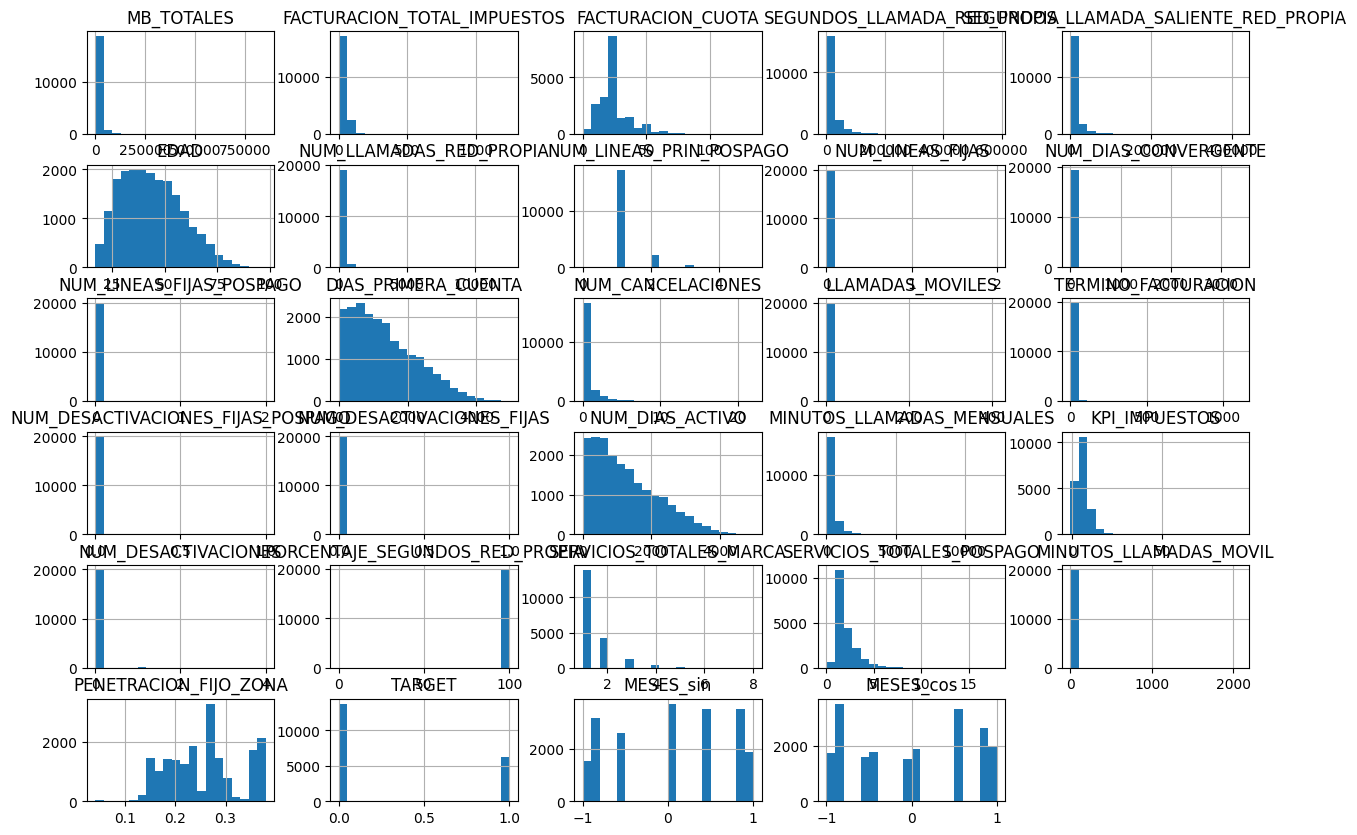

In [ ]:
datos3.hist(bins=20, figsize=(15,10))
plt.show()

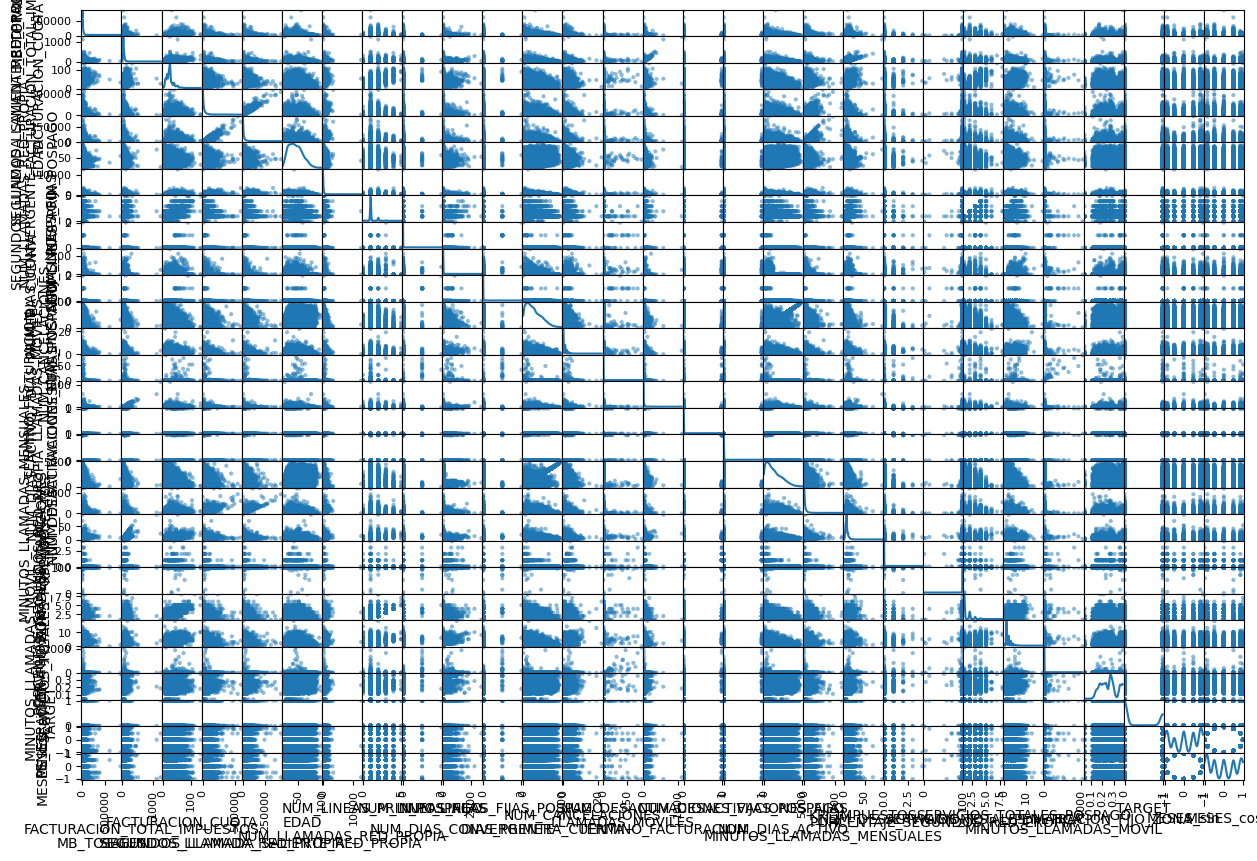

In [ ]:
pd.plotting.scatter_matrix(datos3, figsize=(15,10), diagonal='kde')
plt.show()

In [ ]:
missing_values_count = datos3.isnull().sum()
missing_values_percent = 100 * missing_values_count / len(datos3)
missing_values_datos3 = pd.DataFrame({'count': missing_values_count, 'percent': missing_values_percent})
missing_values_datos3.sort_values('percent', ascending=False)

,count,percent
PENETRACION_FIJO_ZONA,1323,6.615
NUM_DIAS_ACTIVO,550,2.750
PORCENTAJE_SEGUNDOS_RED_PROPIA,263,1.315
MB_TOTALES,259,1.295
MINUTOS_LLAMADAS_MENSUALES,251,1.255
SEGUNDOS_LLAMADA_RED_PROPIA,157,0.785
SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA,157,0.785
NUM_LLAMADAS_RED_PROPIA,157,0.785
LLAMADAS_MOVILES,82,0.410
MINUTOS_LLAMADAS_MOVIL,82,0.410


In [ ]:
datos3_arbol=datos3

In [ ]:
X = datos3_arbol.drop("TARGET", axis=1)
y = datos3_arbol["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un imputador para los valores faltantes
numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Creamos un escalador para normalizar los datos
scaler = StandardScaler()


# Creamos el pipeline para las variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', numeric_imputer),
    ('scaler', scaler)
])


# Supongamos que num_cols son las columnas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['MB_TOTALES',
'FACTURACION_TOTAL_IMPUESTOS',
'FACTURACION_CUOTA',
'SEGUNDOS_LLAMADA_RED_PROPIA',
'SEGUNDOS_LLAMADA_SALIENTE_RED_PROPIA',
'EDAD',
'NUM_LLAMADAS_RED_PROPIA',
'LLAMADAS_MOVILES', 'TERMINO_FACTURACION', 'NUM_DIAS_ACTIVO',
'MINUTOS_LLAMADAS_MENSUALES', 'PORCENTAJE_SEGUNDOS_RED_PROPIA','MINUTOS_LLAMADAS_MOVIL',
'PENETRACION_FIJO_ZONA'])

    ])

In [ ]:
model_tree= DecisionTreeClassifier(random_state=42)
tree_clf= Pipeline([
    ("preprocessor", preprocessor), 
    ("model_tree", model_tree) 
])

param_grid = {'model_tree__criterion': ['gini', 'entropy'],
              'model_tree__max_depth': list(range(10, 41)),
              'model_tree__min_samples_split': [5,10,15]

              }

grid_search = GridSearchCV(tree_clf, param_grid, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring="accuracy", verbose=1) #hold out en vez de cv
grid_search.fit(X_train, y_train)
print(f'Mejores hiperparámetros: {grid_search.best_params_}')


Fitting 10 folds for each of 186 candidates, totalling 1860 fits
Mejores hiperparámetros: {'model_tree__criterion': 'entropy', 'model_tree__max_depth': 10, 'model_tree__min_samples_split': 5}


In [ ]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f'La precisión del mejor modelo en los datos de prueba es: {test_accuracy}')

La precisión del mejor modelo en los datos de prueba es: 0.67775


In [ ]:
y_pred = best_model.predict(X_test)
sens = recall_score(y_test, y_pred)


print(f'La sensibilidad del mejor modelo en los datos de prueba es: {sens}')
y_pred[1:50]

La sensibilidad del mejor modelo en los datos de prueba es: 0.30455635491606714


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0])

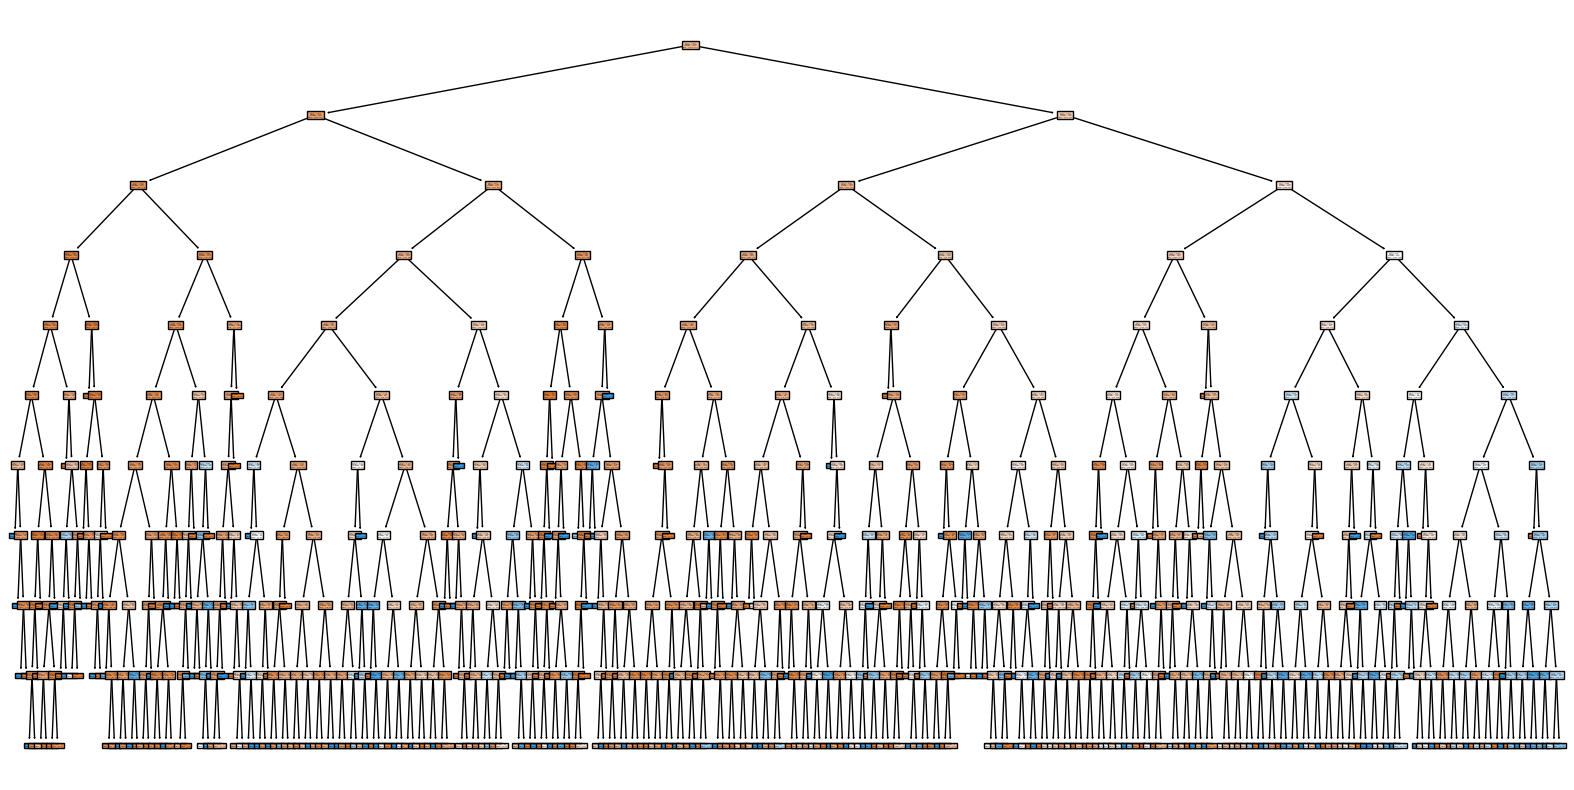

In [ ]:
model_tree = best_model.named_steps['model_tree']

plt.figure(figsize=(20,10))  #  Tamaño de la figura
plot_tree(model_tree, filled=True)
plt.show()


In [ ]:
X_preprocessed = preprocessor.fit_transform(X)

feature_names = preprocessor.get_feature_names_out()

X_df = pd.DataFrame(X_preprocessed, columns=feature_names)
print(X_df)
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=42,min_samples_split=5)
tree_model.fit(X_df,y)
print(tree_model)


       num__MB_TOTALES  num__FACTURACION_TOTAL_IMPUESTOS  \
0            -0.604234                         -1.016049   
1             0.298883                         -0.295181   
2            -0.508680                         -0.115551   
3            -0.456625                         -0.691776   
4             0.666461                         -0.129989   
...                ...                               ...   
19995         0.406521                         -0.637626   
19996        -0.479852                         -0.143600   
19997        -0.614769                         -1.037260   
19998         0.196307                         -0.295181   
19999        -0.359400                         -0.690553   

       num__FACTURACION_CUOTA  num__SEGUNDOS_LLAMADA_RED_PROPIA  \
0                   -1.930632                         -0.466380   
1                    0.097431                         -0.189425   
2                    0.476974                         -0.608887   
3          

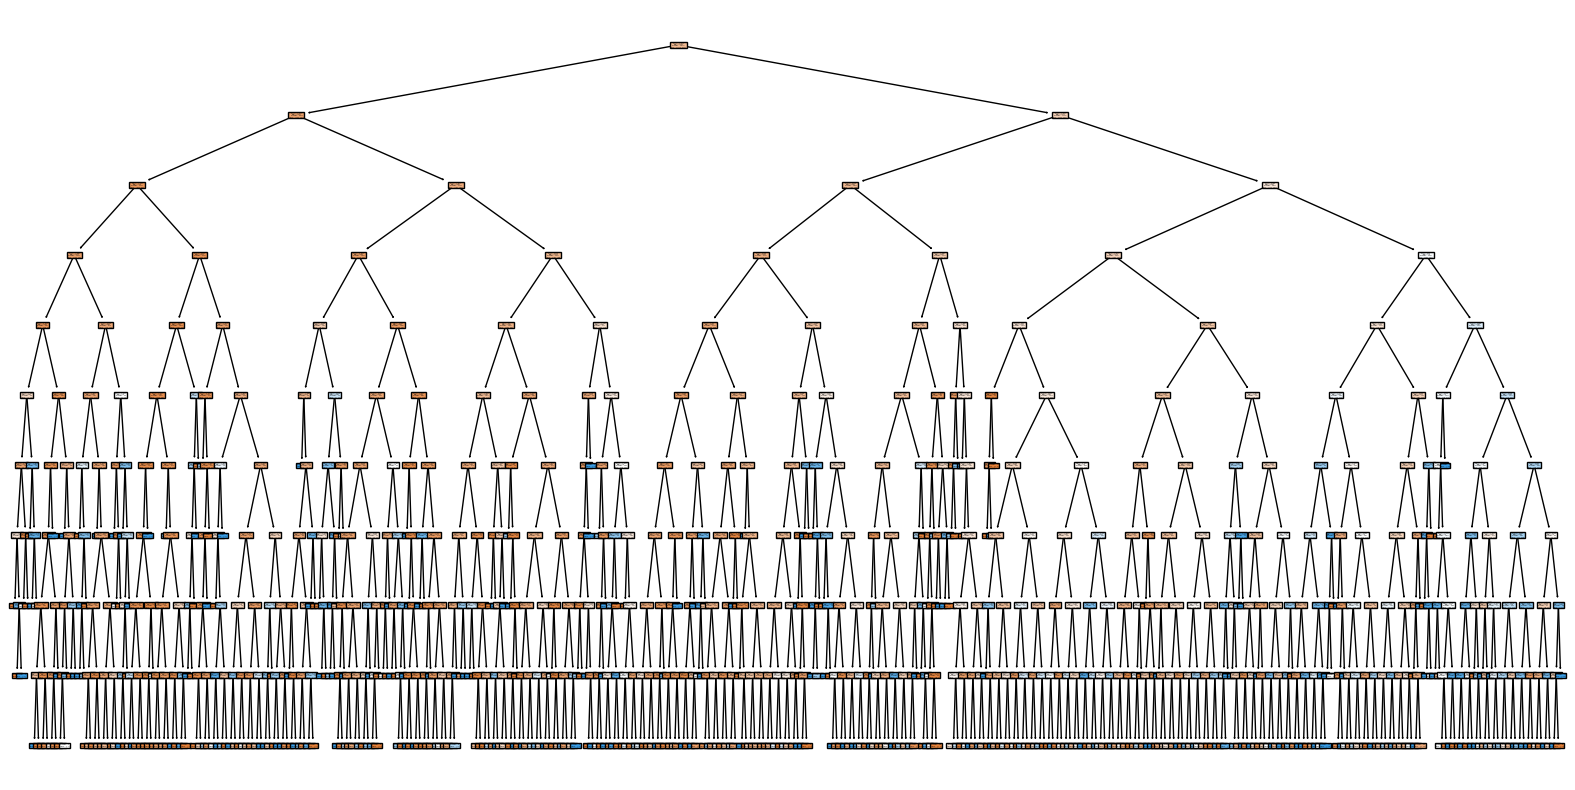

In [ ]:
plt.figure(figsize=(20,10))  #  Tamaño de la figura
plot_tree(tree_model, filled=True)
plt.show()

In [ ]:
datos3_red=datos3

X_red = datos3_red.drop("TARGET", axis=1)
y_red = datos3_red["TARGET"]

# Dividimos el dataset en dos partes 20% de las imagenes totales serán para testeo y el 80% restante para entrenamiento
X_trainred, X_testred, y_trainred, y_testred = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

X_trainred, X_valred, y_trainred, y_valred = train_test_split(X_trainred, y_trainred, test_size=0.2, random_state=42)
print("Imágenes de entrenamiento", X_trainred.shape)
print("Imágenes de test", X_testred.shape)



Imágenes de entrenamiento (12800, 28)
Imágenes de test (4000, 28)


In [ ]:
# Crear un modelo con una capa de entrada y una capa oculta
model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, input_dim=X_trainred.shape[1], activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Normalizar los datos de entrada
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(X_trainred)
X_trainred_norm = normalizer(X_trainred)
X_testred_norm = normalizer(X_testred)


# Reemplazar los valores faltantes con 0
X_trainred_norm = tf.where(tf.math.is_nan(X_trainred_norm), tf.zeros_like(X_trainred_norm), X_trainred_norm)
X_testred_norm = tf.where(tf.math.is_nan(X_testred_norm), tf.zeros_like(X_testred_norm), X_testred_norm)


AttributeError: module 'keras.api._v2.keras' has no attribute 'wrappers'

In [ ]:
# Entrena el modelo
model.fit(X_trainred_norm, y_trainred, epochs=10, batch_size=32, validation_data=(X_testred_norm, y_testred))

In [ ]:
# Se obtienen las probabilidades predichas por el modelo
y_pred_probs = model.predict(X_testred_norm)

# Definimos un umbral
threshold = 0.4

# Aplica el umbral a las probabilidades para obtener las predicciones de clase
y_pred = [1 if prob > threshold else 0 for prob in y_pred_probs]

# Ahora y_pred contiene tus predicciones de clase basadas en el umbral que has definido
y_pred[1:10]

In [ ]:
# Evalúa el modelo
loss, accuracy = model.evaluate(X_testred_norm, y_testred)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')


Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
388/400 [============================>.] - ETA: 0s - loss: 0.6131 - accuracy: 0.6850

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
400/400 [==============================] - 8s 9ms/step - loss: 0.6130 - accuracy: 0.6850 - val_loss: 0.6116 - val_accuracy: 0.6848
Epoch 2/10
400/400 [==============================] - 2s 5ms/step - loss: 0.6054 - accuracy: 0.6902 - val_loss: 0.6118 - val_accuracy: 0.6852
Epoch 3/10
400/400 [==============================] - 2s 6ms/step - loss: 0.6033 - accuracy: 0.6912 - val_loss: 0.6117 - val_accuracy: 0.6840
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.6025 - accuracy: 0.6920 - val_loss: 0.6108 - val_accuracy: 0.6873
Epoch 5/10
400/400 [==============================] - 1s 3ms/step - loss: 0.6017 - accuracy: 0.6924 